# Logistic Regression (Binary Classification)
Logistic Regression, unlike its name, is a classification model. It is a linear-based model that follows the linear equation in (1) to predict values:

$\begin{equation}
    z = \omega x + b,
\end{equation}$

where $\omega$ is the weight of the model, $x$ represents the independent data, and $b$ shows the bias. For the classification purposes, the output $z$ is fed into the sigmoid function as

$\begin{equation}
    \hat{z} = \frac{1}{1 + e^{-z}}
\end{equation}$

Finally, $\hat{y}$ represents the corresponding label so that

$\begin{equation}
\hat{y} =
\begin{cases}
    0 & \text{if~} \hat{z} < 0.5\\
    1 & \text{otherwise}
\end{cases}
\end{equation}$

## How to Implement LogisticRegression for Binary Classification
We use stochastic gradient descent (SGD) to train the model. Hence, assuming a learning rate of $\alpha$ and the maximum number of iterations $n\_iters$, we

1. initialize the weigths as zero
2. initialize the bias as zero
3. calculate $\frac{\partial z}{\partial\omega}$
4. calculate $\frac{\partial z}{\partial b}$
5. update weights as $\omega = \omega - \alpha.\frac{\partial z}{\partial\omega}$
6. update bias as $b = b - \alpha.\frac{\partial z}{\partial b}$
7. repeat steps 3 - 6 for $n\_iters$ times

For the inference part, we use the updated weights and bias in Eq. (2) and calculate the labels using Eq. (3)

It is worth noting that the current document is based on the guidelines provided in https://www.youtube.com/watch?v=YYEJ_GUguHw.

## Define the Manual Model

### Import Required Libraries

In [1]:
import numpy as np
import warnings

# suppress warnings
warnings.filterwarnings('ignore')

### Define Required Functions

In [2]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

### LogisticRegression Class

In [3]:
class logisticRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            z = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(z)

            dw = (1/n_samples) * 2 * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * 2 * np.sum(predictions - y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(z)

        return [1 if y >= 0.5 else 0 for y in y_pred]

## Train and Inference

### Import Required Libraries

In [4]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Define Required Functions

In [5]:
def plot(data_df, title):
    plt.Figure(figsize=(12, 6))
    plt.scatter(data_df['mean radius'], data_df['mean texture'], c=data_df['target'], cmap='viridis')
    plt.xlabel('Mean Radious')
    plt.ylabel('Mean Texture')
    plt.colorbar(label='Diagnosis')
    plt.title(title)
    plt.show()

### Import Data

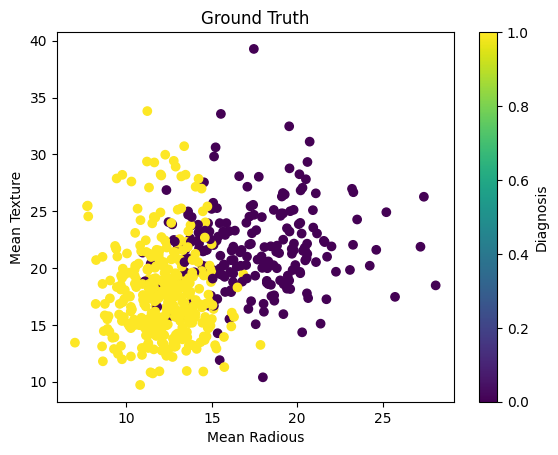

In [6]:
dataset = datasets.load_breast_cancer()
X, y = dataset.data, dataset.target

# plot data
df = pd.DataFrame(X, columns=dataset.feature_names)
df['target'] = y

plot(df, "Ground Truth")

### Train-Test Data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

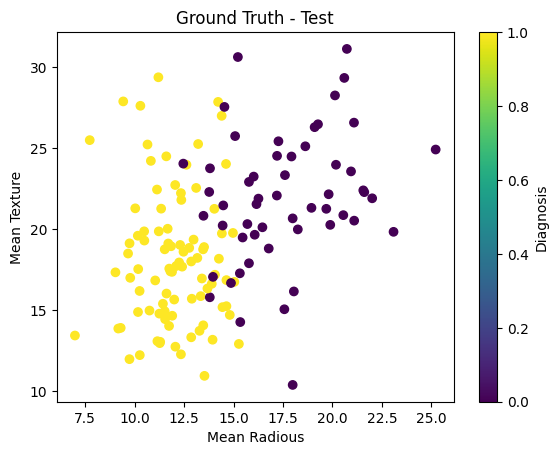

In [8]:
# plot the results
df_test = pd.DataFrame(X_test, columns=dataset.feature_names)
df_test['target'] = y_test

plot(df_test, "Ground Truth - Test")

### Implement Manual LogisticRegression

In [9]:
# train
clf_logr = logisticRegression()
clf_logr.fit(X_train, y_train)

# inference
y_pred = clf_logr.predict(X_test)

# evaluations
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy of Predictions with lr = {clf_logr.lr}: {accuracy}")

Accuracy of Predictions with lr = 0.001: 0.9440559440559441


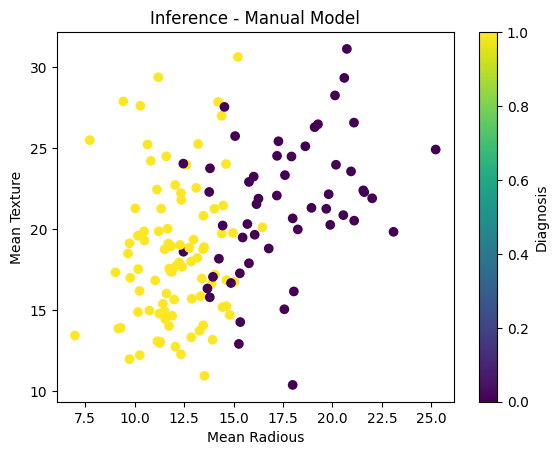

In [10]:
df_pred = pd.DataFrame(X_test, columns=dataset.feature_names)
df_pred['target'] = y_pred

plot(df_pred, "Inference - Manual Model")

## Compare with Sklearn LogisticRegression

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
# train
clf_logr_sklearn = LogisticRegression()
clf_logr_sklearn.fit(X_train, y_train)

# inference
preds = clf_logr_sklearn.predict(X_test)

#evaluations
accuracy_sklearn = np.mean(preds == y_test)

print(f"Accuracy of Sklearn Predictions with tolerate = {clf_logr_sklearn.tol}: {accuracy_sklearn}")

Accuracy of Sklearn Predictions with tolerate = 0.0001: 0.965034965034965


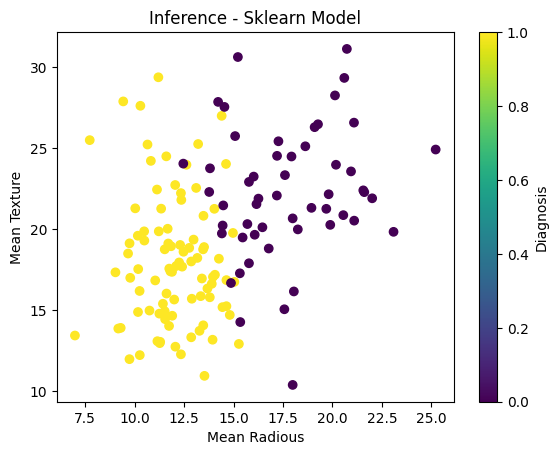

In [13]:
df_pred_sklearn = pd.DataFrame(X_test, columns=dataset.feature_names)
df_pred_sklearn['target'] = preds

plot(df_pred_sklearn, "Inference - Sklearn Model")